# A/B Testing and  Market Analysis for Online Store


In collaboration with the sales team, we have formulated a set of hypotheses aimed at enhancing the performance of our sales strategies. These hypotheses have been meticulously examined, and based on their potential impact, we have strategically prioritized them for implementation. To validate their effectiveness, we have initiated a series of controlled A/B tests, meticulously tracking the outcomes and meticulously analyzing the collected data.

## Objective

1. Cumulative Revenue Analysis:

* Create graphs depicting the cumulative revenue for both Group A and Group B.

* Draw conclusions and formulate hypotheses based on the revenue trends.

2. Cumulative Average Order Size Examination:

* Generate graphs illustrating the cumulative average order size for Group A and Group B.

* Analyze the data to draw conclusions and make informed conjectures regarding the order size dynamics.

3. Relative Difference in Cumulative Order Size:

* Plot a graph showcasing the relative difference in cumulative average order size between Group B and Group A.

* Make conclusions and formulate hypotheses regarding the significance of this difference.

4. Conversion Rate Analysis:

* Calculate the daily conversion rates for both groups by comparing orders to the number of visits.

* Visualize these rates and describe any notable differences between the two groups.

5. User Order Behavior Exploration:

* Create a scatter chart to examine the distribution of the number of orders per user.

* Formulate conclusions and hypotheses based on user order patterns.

6. Identify Anomalies in User Behavior:

* Calculate the 95th and 99th percentiles for the number of orders per user.

* Define the threshold at which data points become anomalies, if applicable.

7. Order Price Analysis:

* Construct a scatter chart to visualize the distribution of order prices.

* Make observations and draw hypotheses based on order price trends.

8. Identify Anomalies in Order Prices:

* Calculate the 95th and 99th percentiles for order prices.
* Define the point at which an order price is considered an anomaly.

9. Statistical Significance Testing (Raw Data):

* Evaluate the statistical significance of differences in conversion rates and average order sizes between groups using raw data.

* Formulate conclusions and conjectures based on the results.

10.Statistical Significance Testing (Filtered Data):

* Reassess the statistical significance of group differences in conversion rates and average order sizes using filtered data.
* Make informed conclusions and hypotheses based on the filtered data analysis.

11.Decision-Making Based on Test Results:

* Ultimately, make a decision regarding the A/B test.
* Possible outcomes include stopping the test and declaring one group as the leader, stopping the test with the conclusion of no 

12.significant difference, or deciding to continue with the test.

* Through the comprehensive execution of these tasks, we aim to gain a deep understanding of the A/B test results and make data-
* driven decisions that will have a meaningful impact on our strategies and objectives.













## Description of dataset

Hypotheses — brief descriptions of the hypotheses

-Reach — user reach, on a scale of one to ten

-Impact — impact on users, on a scale of one to ten

-Confidence — confidence in the hypothesis, on a scale of one to ten

-Effort — the resources required to test a hypothesis, on a scale of one to ten. The higher the Effort value, the more resource-intensive the test.

Orders — brief descriptions of the orders

-transactionId — order identifier

-visitorId — identifier of the user who placed the order

-date — of the order

-revenue — from the order

-group — the A/B test group that the user belongs to

Visits — brief descriptions of the visits

-date — date

-group — A/B test group

-visits — the number of visits on the date specified in the A/B test group specified

## Table of contens

1.Download the data and prepare it for analysis

2.Make reports and calculate metrics

-Prioritizing Hypotheses

-A/B Test Analysis

## Load and Processing data

In [98]:
# Import the libaries
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [99]:
#load the the hypothese_us_csv data
try:
    hypotheses=pd.read_csv('/datasets/hypotheses_us.csv',sep=';')
except:
    hypotheses=pd.read_csv('hypotheses_us.csv',sep=';')
    

In [100]:
# show first five rows
display(hypotheses.head(5))

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average...,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products ...,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1


In [101]:
#analyze the hypothese file using info method
hypotheses.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 1.6 KB


In [102]:
#check if there is any null values
hypotheses.isnull().sum()

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Effort        0
dtype: int64

In [103]:
#check for duplicates value
hypotheses.duplicated().sum()

0

In [104]:
#load the the visits_us.csv data
try:
    orders=pd.read_csv('/datasets/orders_us.csv',sep=',')
except:
    orders=pd.read_csv('/datasets/orders_us.csv',sep=',')
    

In [105]:
display(orders.head(5))

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [106]:
#analyze the orders file using info method
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 174.3 KB


In [107]:
# convert date in datetime data type
orders['date'] = pd.to_datetime(orders['date'])

In [108]:
# check if there are null values
orders.isnull().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [109]:
# check if there is any duplicate values
orders.duplicated().sum()

0

In [110]:
#check for visitor that may appear in both group A and B
# Identify visitors in both groups
duplicate_orders = orders[orders.duplicated(subset=['group', 'visitorId'], keep=False)]
display(duplicate_orders.head(5))

,transactionId,visitorId,date,revenue,group
15,2550768810,2742574263,2019-08-15,235.0,B
26,2223239646,199603092,2019-08-15,55.7,A
32,3666913472,2038680547,2019-08-15,30.8,B
33,486237576,2378935119,2019-08-15,30.4,A
41,2594268419,237748145,2019-08-15,20.8,A


In [111]:
#clean duplicates
# Remove duplicates (visitors in both groups)
orders = orders.drop(duplicate_orders.index)

In [112]:
#load the the visits_us.csv data
try:
    visits=pd.read_csv('/datasets/visits_us.csv',sep=',')
except:
    visits=pd.read_csv('visits_us.csv',sep=',')
    

In [113]:
#load 5 rows of visits
display(visits.head(5))

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [114]:
#analyze the visits file using info method
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 8.2 KB


In [115]:
# convert date in datetime data type
visits['date'] = pd.to_datetime(visits['date'])

In [116]:
# check if there are null values
visits.isnull().sum()

date      0
group     0
visits    0
dtype: int64

In [117]:
# check if there is any duplicate values
visits.duplicated().sum()

0

## Prioritizing Hypotheses

In [118]:

# Set the maximum column width option
pd.options.display.max_colwidth = 100

# Display or print your DataFrame
print(hypotheses)

                                                                                            Hypothesis  \
0                          Add two new channels for attracting traffic. This will bring 30% more users   
1                                    Launch your own delivery service. This will shorten delivery time   
2  Add product recommendation blocks to the store's site. This will increase conversion and average...   
3  Change the category structure. This will increase conversion since users will find the products ...   
4                     Change the background color on the main page. This will increase user engagement   
5                                  Add a customer review page. This will increase the number of orders   
6              Show banners with current offers and sales on the main page. This will boost conversion   
7             Add a subscription form to all the main pages. This will help you compile a mailing list   
8                                     Launch a

### Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.

In [119]:
hypotheses['ICE']=round((hypotheses['Impact']*hypotheses['Confidence'])/hypotheses['Effort'],2)
# Set the display option to show more column width
pd.set_option('display.max_colwidth', 50)

# Print the sorted DataFrame
print(hypotheses[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))



                                          Hypothesis    ICE
8  Launch a promotion that gives users discounts ...  16.20
0  Add two new channels for attracting traffic. T...  13.33
7  Add a subscription form to all the main pages....  11.20
6  Show banners with current offers and sales on ...   8.00
2  Add product recommendation blocks to the store...   7.00
1  Launch your own delivery service. This will sh...   2.00
5  Add a customer review page. This will increase...   1.33
3  Change the category structure. This will incre...   1.12
4  Change the background color on the main page. ...   1.00


### Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority.

In [120]:
hypotheses['RICE']=(hypotheses['Reach']*hypotheses['Impact']*hypotheses['Confidence'])/hypotheses['Effort']
print(hypotheses[['Hypothesis','RICE']].sort_values(by='RICE', ascending=False))

                                          Hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


Based on the RICE method, the prioritization of hypotheses has shifted. The hypothesis titled "Add a subscription form to all the main pages" now takes precedence, followed by the hypotheses "Add product recommendation blocks to the store" and "Add two new channels for attracting traffic." This change in prioritization is primarily driven by the "Reach" parameter, which plays a pivotal role in the RICE framework.

For example, "Add a subscription form to all the main pages" has a significantly higher reach value of 112, while "Launch a promotion that gives users discounts" has a lower reach value of 1. Consequently, due to its substantially broader potential audience impact, "Add a subscription form to all the main pages" has now been elevated to the top priority, making it the first choice for implementation and testing.

### Show how the prioritization of hypotheses changes when you use RICE instead of ICE. Provide an explanation for the changes.

##  A/B Test Analysis

### Graph cumulative revenue by group. Make conclusions and conjectures.

In [121]:
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [122]:
# drop values that is not unique paired date-group values
datesGroups = orders[['date','group']].drop_duplicates()
# Calculate the cumulative sum of revenue for each group in orders
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])] .agg({
    'date' : 'max', 
    'group' : 'max', 
    'transactionId' : pd.Series.nunique, 
    'visitorId' : pd.Series.nunique, 
    'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
ordersAggregated.head(5)

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,15,15,1427.4
66,2019-08-01,B,19,19,1258.8
175,2019-08-02,A,31,31,2224.8
173,2019-08-02,B,40,40,3746.8
291,2019-08-03,A,55,55,4040.0


In [123]:
# calculative the culminative visit for each group in visits
visitorsAggregated = datesGroups.apply(
lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated.head(5)

,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [124]:
# merge orders and visits and name its column with new data frames
# merging the two tables into one and giving its columns descriptive names
cummulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cummulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cummulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      15      15   1427.4       719
1 2019-08-01     B      19      19   1258.8       713
2 2019-08-02     A      31      31   2224.8      1338
3 2019-08-02     B      40      40   3746.8      1294
4 2019-08-03     A      55      55   4040.0      1845


In [125]:
# DataFrame with cumulative orders and cumulative revenue by day, group A
cumulativeRevenueA = cummulativeData[cummulativeData['group']=='A'][['date','revenue', 'orders']]

# DataFrame with cumulative orders and cumulative revenue by day, group B
cumulativeRevenueB = cummulativeData[cummulativeData['group']=='B'][['date','revenue', 'orders']]
print(cumulativeRevenueA.head())
print()
print(cumulativeRevenueB.head())

        date  revenue  orders
0 2019-08-01   1427.4      15
2 2019-08-02   2224.8      31
4 2019-08-03   4040.0      55
6 2019-08-04   4709.8      65
8 2019-08-05   6362.4      87

        date  revenue  orders
1 2019-08-01   1258.8      19
3 2019-08-02   3746.8      40
5 2019-08-03   5133.5      55
7 2019-08-04   6605.0      69
9 2019-08-05   8059.8      91


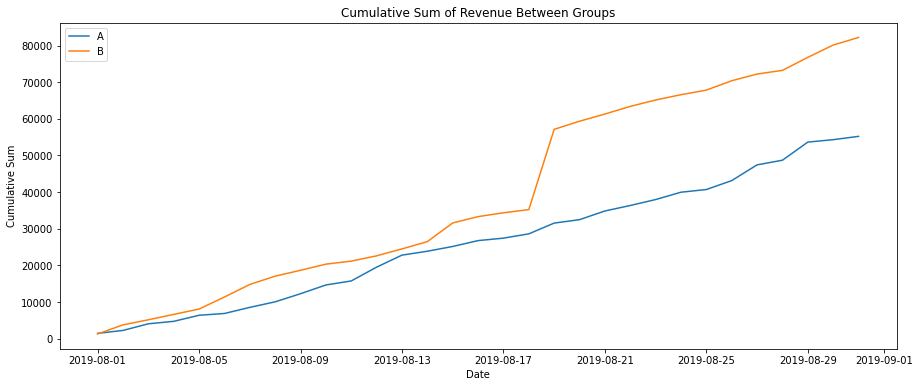

In [126]:
#graphing the cumulative revenue by group
plt.figure(figsize=(15,6))
# Plotting the group A revenue graph 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Plotting the group B revenue graph 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.xlabel('Date')
plt.ylabel('Cumulative Sum')
plt.title('Cumulative Sum of Revenue Between Groups')
plt.legend();

It appears that, overall, group B has generated a higher total revenue. Initially, the difference in cumulative revenue between group A and group B is relatively small. However, on 2019-08-17, there is a significant spike in group B's cumulative revenue, jumping from 40,000 to 50,000. This indicates a noteworthy shift in revenue generation between the two groups.

### Graph cumulative average order size by group. Make conclusions and conjectures.

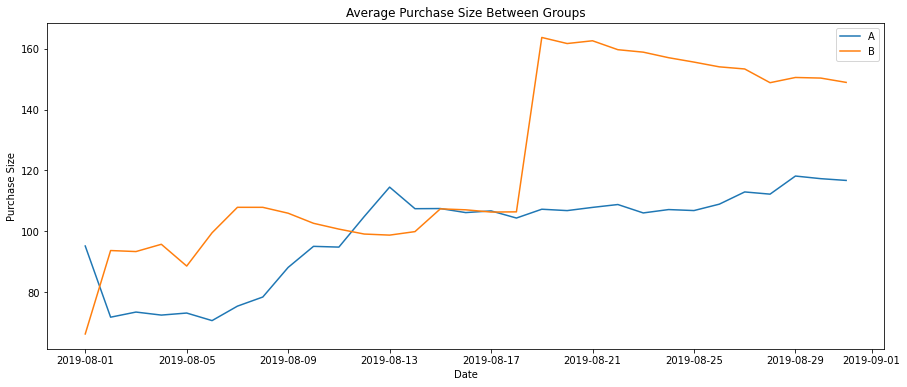

In [127]:
# Create a figure and specify the figure size
plt.figure(figsize=(15, 6))

# Plot the average purchase size for group A
plt.plot(cumulativeRevenueA['date'], (cumulativeRevenueA['revenue']) / (cumulativeRevenueA['orders']), label='A')

# Plot the average purchase size for group B
plt.plot(cumulativeRevenueB['date'], (cumulativeRevenueB['revenue']) / (cumulativeRevenueB['orders']), label='B')

# Set the labels for the x and y axes
plt.xlabel('Date')
plt.ylabel('Purchase Size')

# Set the title for the plot
plt.title('Average Purchase Size Between Groups')

# Add a legend to differentiate between the two groups
plt.legend()

# Show the plot
plt.show()


It's noticeable that the average purchase size for group B started to surpass group A around the 6th of August. Additionally, group B experienced a significant spike in average purchase size around the 18th of the month, whereas group A's average purchase size remained relatively stable during that period. This suggests that there might have been some impactful changes or factors that influenced the purchasing behavior of these two groups during these specific dates.

### Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.

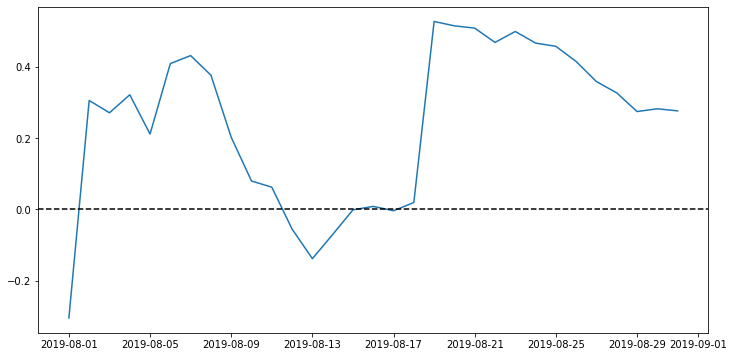

In [128]:
mergedCummulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date',
                                                     right_on='date', how='left', suffixes=['A', 'B'])
# Create a larger figure
plt.figure(figsize=(12, 6))
plt.plot(mergedCummulativeRevenue['date'], (mergedCummulativeRevenue['revenueB']/mergedCummulativeRevenue['ordersB'])/
         (mergedCummulativeRevenue['revenueA']/mergedCummulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')

The dip observed between 2019-08-09 and 2019-08-17 signifies a period when the average order size in group B was significantly lower than that in group A. This implies that, during this period, group B's purchases were on average smaller compared to those in group A.

Conversely, the spike on 2019-08-17 indicates a period when the average order size in group B was significantly higher than in group A. This suggests that, during this period, group B's purchases were on average larger compared to those in group A.

### Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.

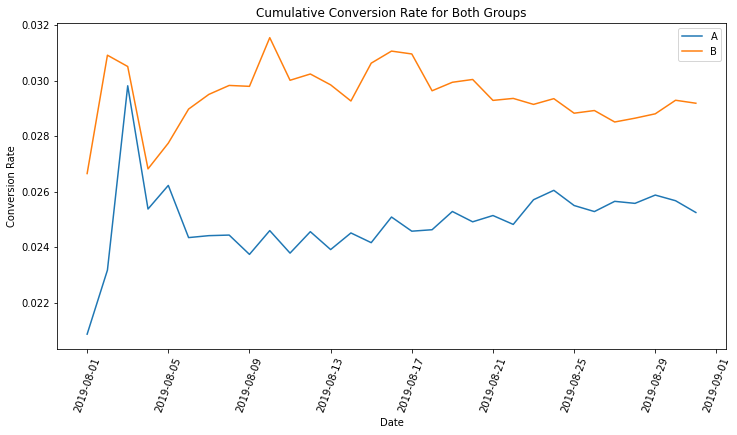

In [129]:
# calculate the conversion
cummulativeData['conversion'] = cummulativeData['orders']/cummulativeData['visitors']

cummulativeDataA = cummulativeData[cummulativeData['group']=='A']
cummulativeDataB = cummulativeData[cummulativeData['group']=='B']
plt.figure(figsize=(12, 6))
plt.plot(cummulativeDataA['date'], cummulativeDataA['conversion'], label='A')
plt.plot(cummulativeDataB['date'], cummulativeDataB['conversion'], label='B')
plt.title('Cumulative Conversion Rate for Both Groups')
plt.ylabel('Conversion Rate')
plt.xlabel('Date')
plt.legend()
plt.xticks(rotation=70)
plt.show()

Initially, both groups experienced a drop in conversion rates. However, starting from 2019-08-05, group B began to show a spike and eventually stabilized. In contrast, group A continued to decline in conversion rate, reaching 0.024, before stabilizing.

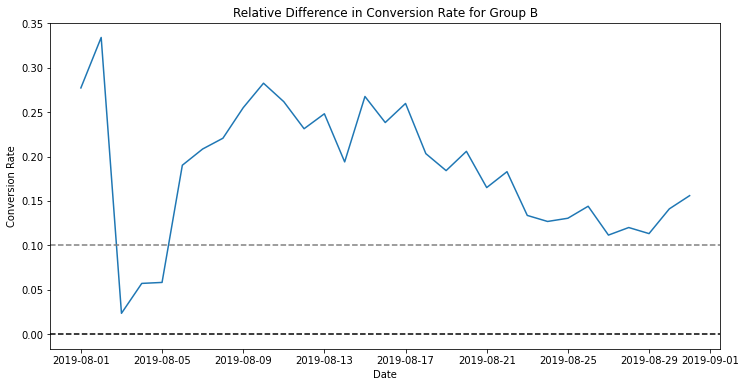

In [130]:
# plotting the relative difference in conversion rate
mergedCummulativeConversions = cummulativeDataA[['date','conversion']].merge(cummulativeDataB[['date','conversion']],
                                                                             left_on='date', right_on='date', how='left', 
                                                                             suffixes=['A', 'B'])
plt.figure(figsize=(12, 6))
plt.title('Relative Difference in Conversion Rate for Group B')
plt.ylabel('Conversion Rate')
plt.xlabel('Date')
plt.plot(mergedCummulativeConversions['date'], mergedCummulativeConversions['conversionB']/
         mergedCummulativeConversions['conversionA']-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')

Initially, the conversion rate for group B experienced a drop. This indicates that during that period, group B had a significantly lower conversion rate compared to group A. However, it then suddenly spiked, signifying that during that specific period, group B had a significantly higher conversion rate compared to group A, only to later start declining and eventually stabilize.

### Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.

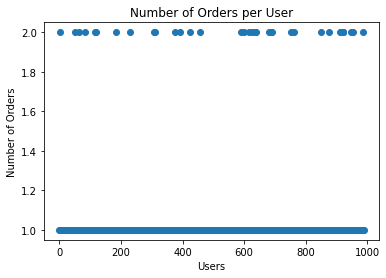

In [131]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', 
                                                                          as_index=False).agg({'transactionId' : 
                                                                                               pd.Series.nunique})

ordersByUsers.columns = ['userId','orders']
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Number of Orders per User')
plt.xlabel('Users')
plt.ylabel('Number of Orders')
plt.show()



 We can conclude that the majority ordered placed 1 order and a good amount did place 2 orders

### Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.

In [132]:
np.percentile(ordersByUsers['orders'], [95, 99, 99.9])

array([1., 2., 2.])

95th Percentile: 1.0

* This means that 95% of users have made 1 order or fewer. Users with 2 or more orders are in the top 5% regarding the number of orders made. Anomalies might be considered users with 2 or more orders.

99th Percentile: 2.0

* This means that 99% of users have made 2 orders or fewer. Users with 3 or more orders are in the top 1% regarding the number of orders made. Anomalies might be considered users with 3 or more orders.

99.9th Percentile: 2.0

* This means that 99.9% of users have made 2 orders or fewer. Users with 3 or more orders are in the top 0.1% regarding the number of orders made. Anomalies might still be considered users with 3 or more orders.

### Plot a scatter chart of order prices. Make conclusions and conjectures.

In [133]:
# prints the top 10 rows of the orders DataFrame sorted by the 'revenue' column in descending order
print(orders.sort_values(by='revenue',ascending=False).head(10))

      transactionId   visitorId       date  revenue group
425       590470918  1920142716 2019-08-19  19920.4     B
1196     3936777065  2108080724 2019-08-15   3120.1     B
858       192721366  1316129916 2019-08-27   1450.2     A
1136      666610489  1307669133 2019-08-13   1425.8     A
744      3668308183   888512513 2019-08-27   1335.6     B
682      1216533772  4266935830 2019-08-29   1220.2     B
662      1811671147  4266935830 2019-08-29   1220.2     A
743      3603576309  4133034833 2019-08-09   1050.0     A
1103     1348774318  1164614297 2019-08-12   1025.8     A
1099      316924019   148427295 2019-08-12   1015.9     A


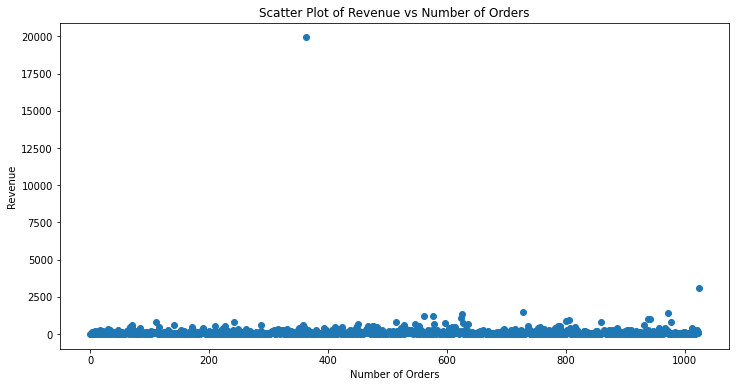

In [134]:
#plot the scatter graph
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(12, 6))
plt.scatter(x_values, orders['revenue'])
plt.ylabel('Revenue')
plt.xlabel('Number of Orders')
plt.title('Scatter Plot of Revenue vs Number of Orders')
plt.show()

Most orders are below 2500, with a few exceptions that surpass this threshold, possibly indicating outliers.

### Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.

In [135]:
np.percentile(orders['revenue'], [95,99])

array([439.3  , 924.192])

The 95th percentile of order prices is approximately 439.3, and the 99th percentile is approximately 924.192. Any order price beyond these values could be considered an anomaly or outlier.

### Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.

There are two hypothesis tests:
Null Hypothesis: There is no statistically significant distinction between the two groups.

Alternative Hypothesis: There exists a statistical significance between the two groups.

In [136]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() -
                                                  len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - 
                                                  len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("{0:.5f}".format(stats.mannwhitneyu(sampleA ,sampleB)[1]))
print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.01894
0.156


Given that the p-value is less than the significance level of 0.05, we have sufficient evidence to reject the null hypothesis. This suggests that there is a statistically significant difference in the conversion rates between the two groups. Furthermore, we observe a relative difference of 15% between the conversion rates of these groups

### Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.

There are two hypothesis tests:

Null Hypothesis: There is no statistically significant distinction between the two groups.

Alternative Hypothesis: There exists a statistical significance between the two groups.

In [137]:
# Mann-Whitney U Test P-Value Calculation:
print("{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

# Relative Difference in Average Order Size:
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))



0.848
0.276


The p-value exceeds the 0.05 significance threshold, indicating the absence of statistically significant disparities in average order size between the groups. However, there remains a relative difference of 27.8% between the two groups which is likely due to random variability rather than a true difference between the groups.

### Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.

In [139]:
# Identifying Users with Many Orders and Expensive Orders:
# Identifying Users with Many Orders and Expensive Orders:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']], axis=0)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']

# Adding Users with Many Orders and Expensive Orders to the same DataFrame:
usersWithManyAndExpensiveOrders = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)



The p-value is less than 0.05, indicating a statistically significant difference between the two filtered groups. The relative difference in performance is 17.8%. This suggests that group B outperforms group A in the analyzed context.

### Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.

There are two hypothesis tests:

Null Hypothesis: There is no statistically significant distinction between the two groups.

Alternative Hypothesis: There exists a statistical significance between the two groups.

In [43]:
# Filter orders data for group A and B, excluding abnormal users
filtered_orders_A = orders[(orders['group'] == 'A') & (~orders['visitorId'].isin(abnormalUsers))]['revenue']
filtered_orders_B = orders[(orders['group'] == 'B') & (~orders['visitorId'].isin(abnormalUsers))]['revenue']

# Calculate p-value using Mann-Whitney U test
p_value = stats.mannwhitneyu(filtered_orders_A, filtered_orders_B)[1]

# Calculate relative difference in average order size
mean_order_size_A = filtered_orders_A.mean()
mean_order_size_B = filtered_orders_B.mean()
relative_difference = (mean_order_size_B / mean_order_size_A) - 1

# Print the results
print("P-value for Mann-Whitney U test: {:.3f}".format(p_value))
print("Relative Difference in Average Order Size: {:.3f}".format(relative_difference))


P-value for Mann-Whitney U test: 0.848
Relative Difference in Average Order Size: 0.276


P-value for Mann-Whitney U test: The p-value of 0.848 is higher than the typical significance level of 0.05. This suggests that there is no statistically significant difference in the average order size between the two groups when using the filtered data. In other words, we do not have enough evidence to reject the null hypothesis.

Relative Difference in Average Order Size: The relative difference in average order size is 0.276, indicating that, on average, group B's orders are 27.6% larger than those of group A when using the filtered data. However, it's important to note that this difference is not statistically significant, as indicated by the p-value exceeding the significance level of 0.05. Therefore, we cannot conclude that group B's average order size is significantly better than that of group A; any observed differences could be due to random variation.

### Make a decision based on the test results. The possible decisions are: 1. Stop the test, consider one of the groups the leader. 2. Stop the test, conclude that there is no difference between the groups. 3. Continue the test.

The analysis of both raw data and filtered data revealed significant differences in conversion rates between the two groups. However, there were no significant variations in the average order size. Notably, Group B's conversion rate graph displayed positive trends, indicating better performance. Conversely, the graph illustrating the relative difference in average order size favored Group B, showing a substantial increase.

Considering these findings, I would recommend concluding the test at this point. The statistical significance in the conversion rate between the groups suggests that Group B outperforms Group A in terms of both average order size and conversion rate. With substantial and consistent differences emerging between the groups, it is advisable to halt the test and assert that there is an overall statistical significance between the two groups.